# 13AR_phewas_plots

03/18/2021

In [1]:
library(tidyverse)
library(pheatmap)
library(RColorBrewer)
library(viridis)
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
    
   dev.off()
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: viridisLite



In [2]:
save_dir = 'ukbiobank_phewas/processed/'

In [3]:
# get psych codes
psych_codes = read.csv('/Users/mguo123/Google Drive/0_altman/db/ukbiobank/psych_codes.csv',stringsAsFactor=F)
length(psych_codes)
head(psych_codes)

[1] 2

,key,description
,<chr>,<chr>
1,189_irnt,Townsend deprivation index at recruitment
2,189_raw,Townsend deprivation index at recruitment
3,1920,Mood swings
4,1930,Miserableness
5,1940,Irritability
6,1950,Sensitivity / hurt feelings


# plot snp v phenotype

In [234]:
snp_phenotype_wide_df = read.csv(paste0(save_dir,'snp_phenotype_wide_df_beta.csv'),row.names=1, stringsAsFactor=F)
snp_phenotype_wide_df_logfc = read.csv(paste0(save_dir,'snp_phenotype_wide_df_mpralogfc.csv'),row.names=1, stringsAsFactor=F)
snp_phenotype_wide_df_bin = read.csv(paste0(save_dir,'snp_phenotype_wide_df_bin.csv'),row.names=1, stringsAsFactor=F)
dim(snp_phenotype_wide_df_bin)


[1] 421  65

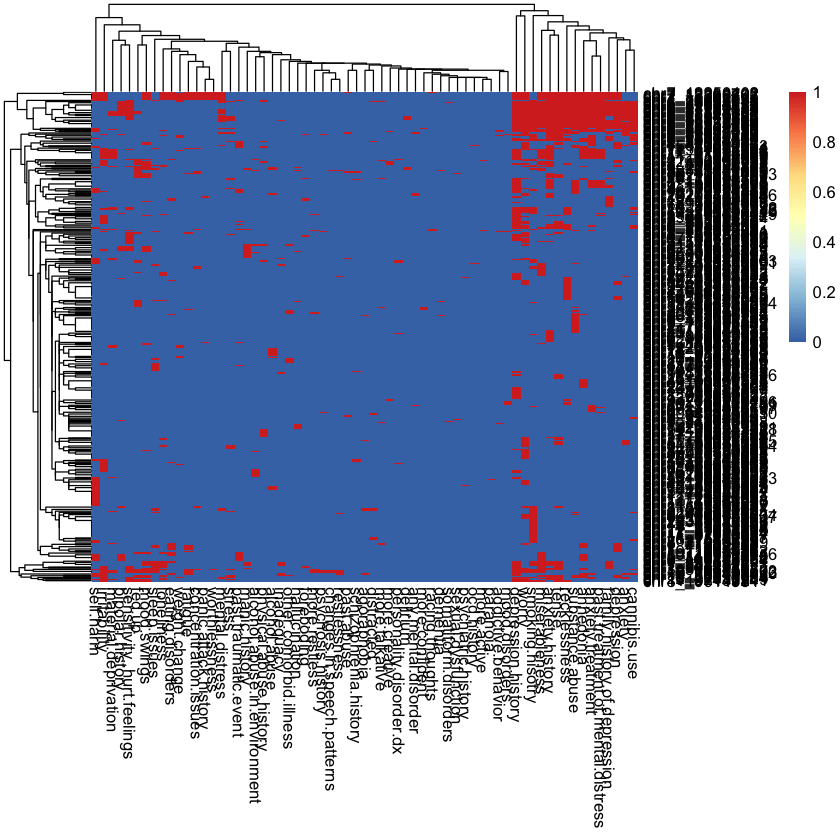

In [235]:
p = pheatmap(snp_phenotype_wide_df_bin)

In [236]:
round(dim(snp_phenotype_wide_df_bin)[2]/6)

[1] 11

In [237]:
# plot dendrogram of phenotypes and how they are related
pdf(paste0(save_dir, 'snp_phenotype_wide_df_bin_phenotype_tree.pdf'),
    width=round(dim(snp_phenotype_wide_df_bin)[2]/6),height=20)
par(bg='white')
plot(p$tree_col)
dev.off()

pdf 
  2

# 2. disease plots

## A. by count

In [238]:
dz_phenotype_count_wide_df = read.csv(paste0(save_dir, 'dz_phenotype_count_wide_df.csv'),
                                      row.names=1, stringsAsFactor=F)
# SCALE/NORM
dz_phenotype_count_wide_df = scale(dz_phenotype_count_wide_df)
dz_phenotype_count_wide_df[dz_phenotype_count_wide_df>2] = 2
dz_phenotype_count_wide_df[dz_phenotype_count_wide_df<0] = 0

# dz_phenotype_count_wide_df = sign(dz_phenotype_count_wide_df)log(dz_phenotype_count_wide_df)
# dz_phenotype_count_wide_df = dz_phenotype_count_wide_df/colSums(dz_phenotype_count_wide_df)
# SELECT DISEASES
# dz_phenotype_count_wide_df = dz_phenotype_count_wide_df[,c('ADHD', 'BPD', 'GAD', 'MDD', 'OCD', 'PD',  'SCZ')]
head(dz_phenotype_count_wide_df)
dim(dz_phenotype_count_wide_df)

,ADHD,ASD,BLPD,BPD,GAD,MDD,OCD,PD,PTSD,SCZ
addictive behavior,0.00000000,0,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0,0.000000,0.000000
agoraphobia,0.08418494,0,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0,0.000000,0.000000
alcohol abuse,0.00000000,0,0.8478247,0.0000000,2.0000000,0.000000,0.0000000,2,0.000000,0.000000
alcohol abuse in environment,0.00000000,2,0.8478247,0.0000000,0.3380232,0.000000,0.9119215,0,1.049558,0.000000
anhedonia,0.08418494,0,0.0000000,1.2354277,0.0000000,1.101268,0.0000000,0,0.000000,1.482026
anxiety,0.08418494,0,0.0000000,0.1004058,0.3380232,0.000000,0.0000000,0,0.000000,0.755627


[1] 65 10

pdf 
  2

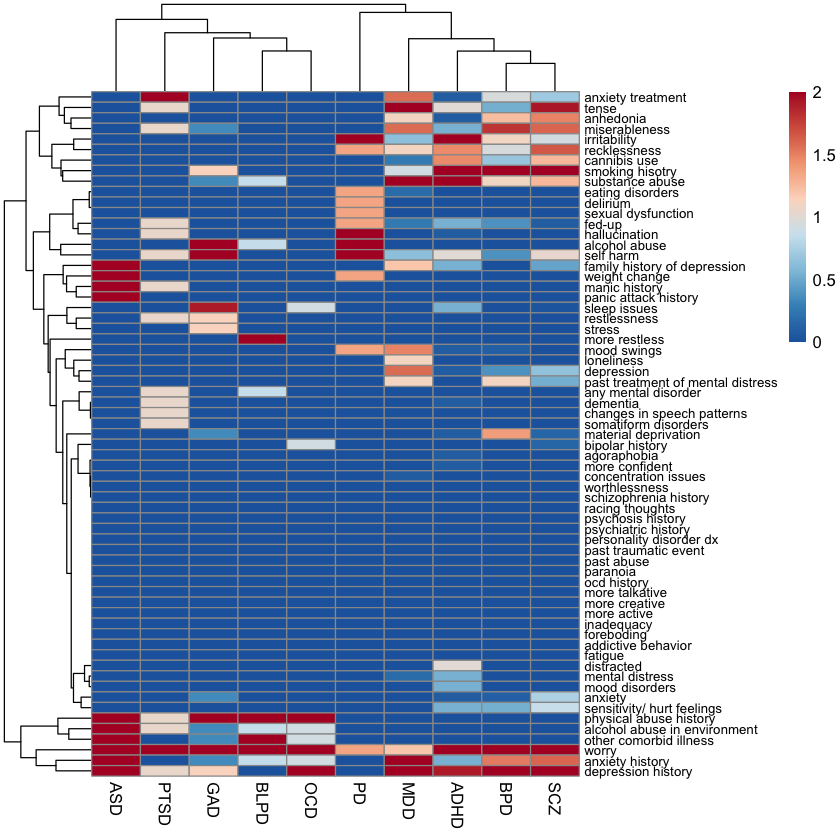

In [239]:
p2 = pheatmap(dz_phenotype_count_wide_df, fontsize_row=8,
                    color = colorRampPalette(rev(brewer.pal(n =8, name ="RdBu")))(255))

save_pheatmap_pdf(p2, paste0(save_dir,'dz_phenotype_count_norm_heatmap.pdf' ),
                 width= 15,height= round(dim(dz_phenotype_count_wide_df)[1]/8))

pdf 
  2

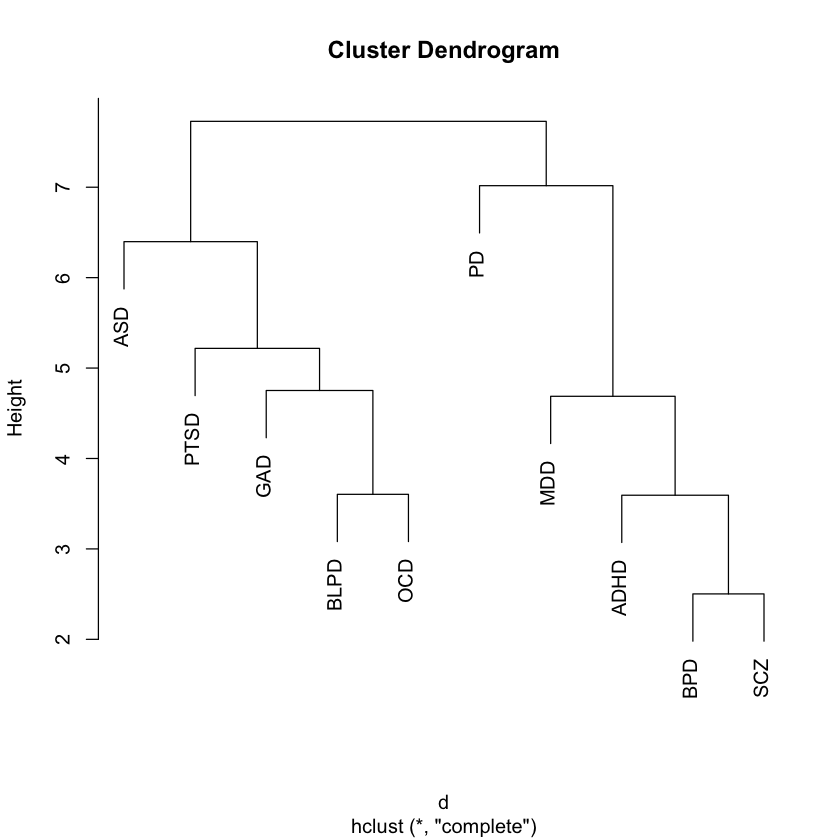

In [240]:
par(bg='white')
plot(p2$tree_col)

pdf(paste0(save_dir, 'dz_phenotype_count_norm_dz_tree.pdf'))
par(bg='white')
plot(p2$tree_col)
dev.off()

In [241]:
pdf(paste0(save_dir, 'dz_phenotype_count_norm_phenotype_tree.pdf'),
    width=round(dim(dz_phenotype_count_wide_df)[1]/6),height=20)
par(bg='white')
plot(p2$tree_row)
dev.off()

pdf 
  2

## B. by beta

In [7]:
dz_phenotype_betamean_long_df = read.csv(paste0(save_dir, 'dz_phenotype_long_df.csv'),
                                      row.names=1, stringsAsFactor=F)
head(dz_phenotype_betamean_long_df)

,rowname,description_abbr,beta,mpra_logfc_mean,diseases
,<chr>,<chr>,<dbl>,<dbl>,<chr>
0,chr10_104359350,past treatment of mental distress,-0.01163870,2.066716,SCZ
1,chr10_104359350,psychosis history,0.00003200,2.066716,SCZ
2,chr10_104426177,anxiety treatment,-0.01004250,-0.919570,SCZ
3,chr10_104426177,past treatment of mental distress,-0.01171335,-0.919570,SCZ
4,chr10_104556054,loneliness,-0.00667050,-1.502654,SCZ
5,chr10_104556054,stress,0.01982560,-1.502654,SCZ


In [20]:
colMax <- function(data) sapply(data, max, na.rm = TRUE)

dz_phenotype_betamean_wide_df = read.csv(paste0(save_dir, 'dz_phenotype_betamean_wide_df.csv'),
                                      row.names=1, stringsAsFactor=F)
dz_phenotype_betamean_wide_df[dz_phenotype_betamean_wide_df>.1] = .1
dz_phenotype_betamean_wide_df[dz_phenotype_betamean_wide_df< -.1] = -.1
# SCALE/NORM
colMax(dz_phenotype_betamean_wide_df)
dz_phenotype_betamean_wide_df = sign(dz_phenotype_betamean_wide_df)*log2(abs(dz_phenotype_betamean_wide_df)+1e-9)
# dz_phenotype_betamean_wide_df = scale(dz_phenotype_betamean_wide_df)
# dz_phenotype_betamean_wide_df[dz_phenotype_betamean_wide_df>1] = 1
# dz_phenotype_betamean_wide_df[dz_phenotype_betamean_wide_df< -1] = -1
# dz_phenotype_betamean_wide_df = scale(dz_phenotype_betamean_wide_df)
# # dz_phenotype_count_wide_df = dz_phenotype_cou?nt_wide_df/colSums(dz_phenotype_count_wide_df)
# # SELECT DISEASES
# dz_phenotype_betamean_wide_df = dz_phenotype_betamean_wide_df[,c('ADHD', 'BPD', 'GAD', 'MDD', 'OCD', 'PD', 'PTSD' 'SCZ')]
head(dz_phenotype_betamean_wide_df)
dim(dz_phenotype_betamean_wide_df)

ADHD         ASD        BLPD         BPD         GAD         MDD 
0.019231400 0.100000000 0.008898573 0.087976585 0.018746523 0.096261674 
        OCD          PD        PTSD         SCZ 
0.069494500 0.010191200 0.019231400 0.100000000

,ADHD,ASD,BLPD,BPD,GAD,MDD,OCD,PD,PTSD,SCZ
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
addictive behavior,0.000000,0.000000,0.000000,4.696106,0.000000,0.000000,0.000000,0.00000,0.000000,5.994842
agoraphobia,-9.898293,0.000000,0.000000,-9.705011,0.000000,0.000000,0.000000,0.00000,0.000000,-11.283388
alcohol abuse,0.000000,0.000000,11.985633,11.638465,12.011976,0.000000,0.000000,14.43871,0.000000,5.090063
alcohol abuse in environment,-8.183472,-3.321928,8.043735,7.291238,8.043735,8.337986,8.043735,0.00000,-8.183472,8.153177
anhedonia,6.436712,0.000000,0.000000,13.141469,0.000000,-9.927664,0.000000,0.00000,0.000000,7.747252
anxiety,6.468530,0.000000,0.000000,6.675233,10.818345,6.912921,0.000000,0.00000,0.000000,6.425752


[1] 65 10

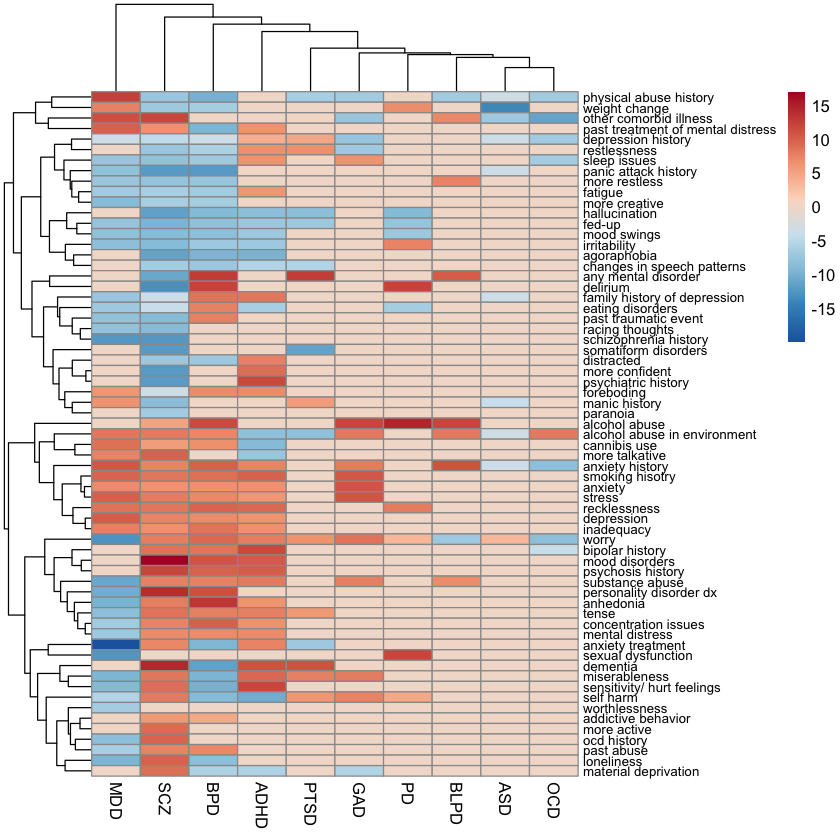

In [21]:
p3 = pheatmap(dz_phenotype_betamean_wide_df, fontsize_row=8,
                    color = colorRampPalette(rev(brewer.pal(n =8, name ="RdBu")))(255))

# save_pheatmap_pdf(p3, paste0(save_dir,'dz_phenotype_betamean_norm_heatmap.pdf' ),
#                  width= 5,height= round(dim(dz_phenotype_betamean_wide_df)[1]/8))

In [10]:
dz_order = colnames(dz_phenotype_betamean_wide_df)[p3$tree_col[['order']]]
phenotype_order = rownames(dz_phenotype_betamean_wide_df)[p3$tree_row[['order']]]


In [11]:
dz_phenotype_betamean_long = data.frame(dz_phenotype_betamean_wide_df)%>%
    rownames_to_column('phenotype')%>%
    pivot_longer(!phenotype, names_to='disease')%>%
    mutate(disease = factor(disease, levels=dz_order))%>%
    mutate(phenotype = factor(phenotype, levels=phenotype_order))
head(dz_phenotype_betamean_long)

phenotype,disease,value
<fct>,<fct>,<dbl>
addictive behavior,ADHD,0.24589339
addictive behavior,ASD,-0.26525719
addictive behavior,BLPD,0.07931055
addictive behavior,BPD,-1.00000000
addictive behavior,GAD,-0.03009898
addictive behavior,MDD,-0.19262416


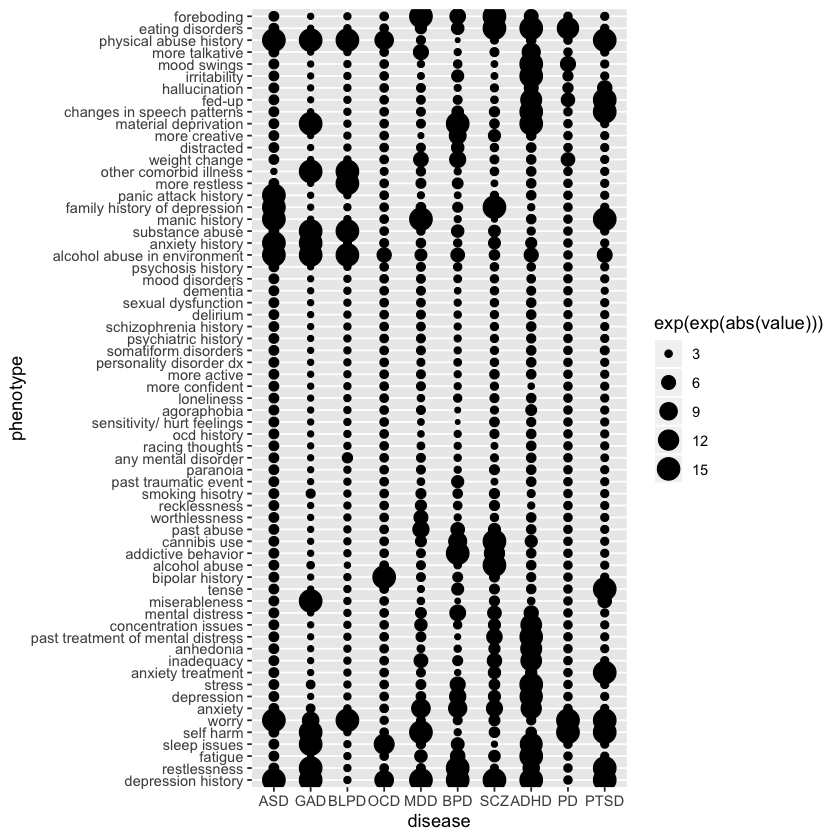

In [316]:
ggplot(dz_phenotype_betamean_long,
      aes(x=disease, y=phenotype, size=exp(exp(abs(value)))))+geom_point()

pdf 
  2

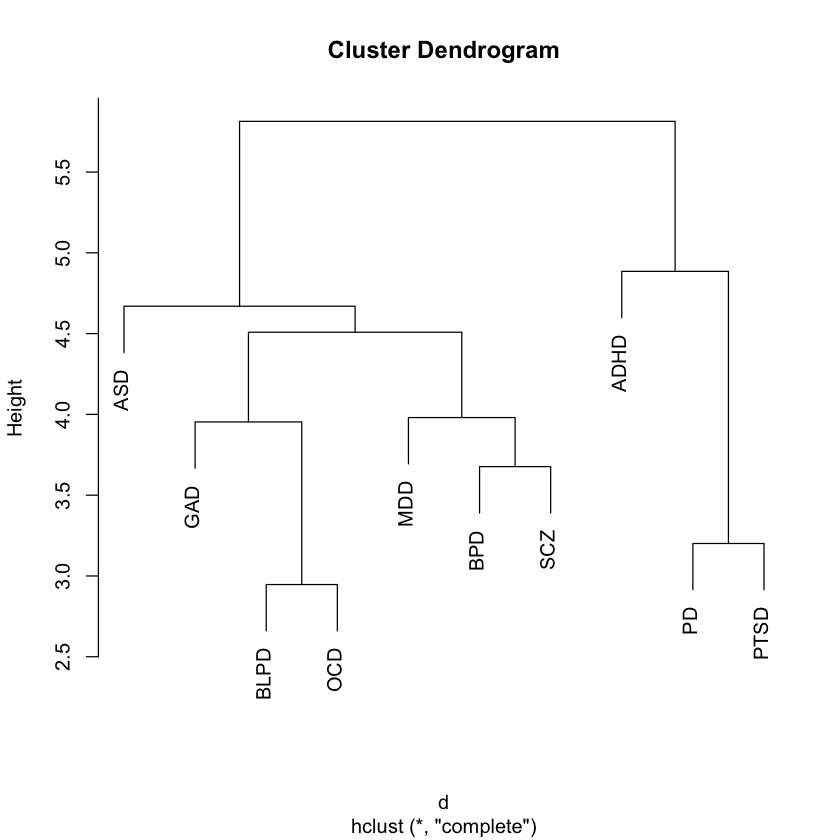

In [285]:
par(bg='white')
plot(p3$tree_col)

pdf(paste0(save_dir, 'dz_phenotype_betamean_norm_dz_tree.pdf'))
par(bg='white')
plot(p3$tree_col)
dev.off()

pdf 
  2

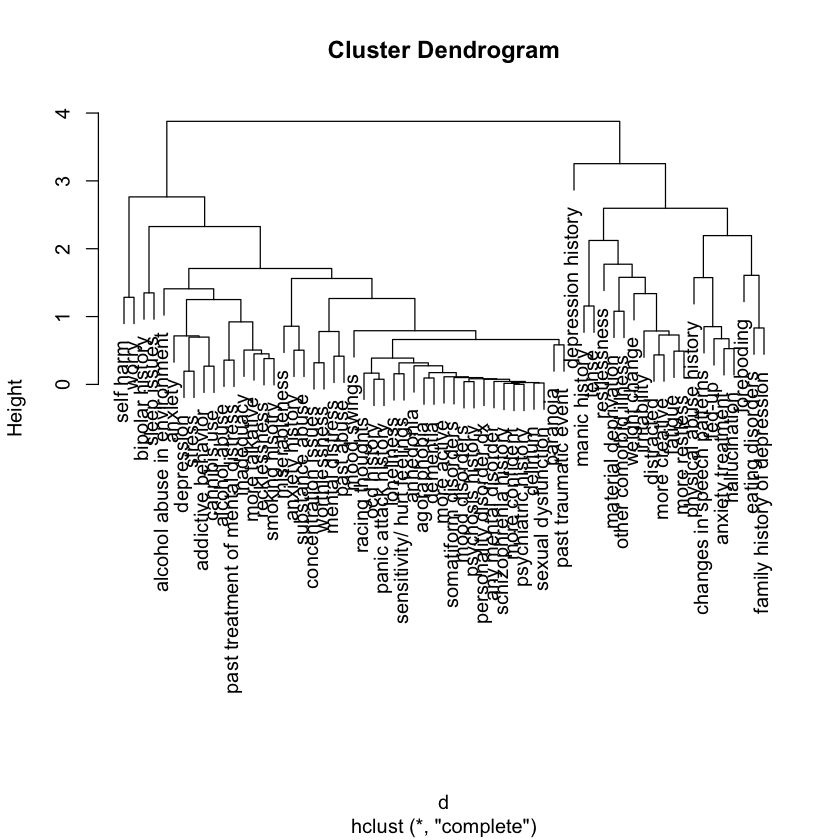

In [280]:
pdf(paste0(save_dir, 'dz_phenotype_count_betamean_phenotype_tree.pdf'),
    width=round(dim(dz_phenotype_betamean_wide_df)[1]/6),height=20)
par(bg='white')
plot(p3$tree_row)
dev.off()
par(bg='white')
plot(p3$tree_row)

# gene x phenotype matrices

In [4]:
common_genes_df = read.csv('common_genes/common_gene_df_updatedMDD.csv',stringsAsFactor=T,row.names=1)
common_genes = sort(filter(common_genes_df,count_dz>1)$gene)
# common_genes
length(common_genes)
c('NEK4','PEMT','GIT1','CNNM2','HLA-C','TOR1A','CYP2D6') %in% common_genes

[1] 137

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [5]:
file = '/Users/mguo123/Google Drive/1_khavari/noncancer_project/miseq/novogene_071420/D_mpraanalyze_barcode_allelic/interesting_egenes.csv'
interesting_egenes = read.csv(file,header=F,stringsAsFactor=F)$V1
# interesting_egenes
interesting_egenes = union(interesting_egenes, c('NEK4','GIT1','CNNM2','HLA-C','TOR1A','CYP2D6'))

note: manually removed some columns from `gene_phenotype_wide_df_beta_manual.csv`

In [6]:
gene_df = read.csv('/Users/mguo123/Documents/pan_omics_psych/data/external/gene_annon_hg19.csv',
                 stringsAsFactor=F)

head(gene_df)
gene_to_chr = gene_df%>%
    select(gene, chr)%>%
    distinct()%>%
#     group_by(gene)%>%
#     tally()%>%
#     filter(n>1)
    filter(!(gene %in% c('CKS1B','LSP1')))%>% #remove duplicate entries
    column_to_rownames('gene')#%>%
head(gene_to_chr) 
# # length(unique(gene_to_chr$TSS))
# dim(gene_to_chr)

,X,chr,start,end,width,strand,gene
,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1,chr1,69091,70008,918,*,OR4F5
2,2,chr1,134901,139379,4479,*,AL627309.1
3,3,chr1,367640,368634,995,*,OR4F29
4,4,chr1,621059,622053,995,*,OR4F16
5,5,chr1,738532,739137,606,*,AL669831.1
6,6,chr1,818043,819983,1941,*,AL645608.2


,chr
,<chr>
OR4F5,chr1
AL627309.1,chr1
OR4F29,chr1
OR4F16,chr1
AL669831.1,chr1
AL645608.2,chr1


In [7]:
colMax <- function(data) sapply(data, max, na.rm = TRUE)

gene_phenotype_betamean_wide_df = read.csv(paste0(save_dir, 'gene_phenotype_wide_df_beta_manual.csv'),
                                      row.names=1, check.names=FALSE, stringsAsFactor=F)
# gene_phenotype_betamean_wide_df = dplyr::select(gene_phenotype_betamean_wide_df, -X)
gene_phenotype_betamean_wide_df[gene_phenotype_betamean_wide_df>.1] = .1
gene_phenotype_betamean_wide_df[gene_phenotype_betamean_wide_df< -.1] = -.1

dim(gene_phenotype_betamean_wide_df)
# 'NEK4' %in% rownames(gene_phenotype_betamean_wide_df)

# # filtering genes of interest
dim(gene_phenotype_betamean_wide_df)
genes_of_interest =common_genes# intersect(common_genes, interesting_egenes)
genes_of_interest = union(genes_of_interest, c('CHRNA2',"TIMM10","CALHM2", 'NEK4','PEMT','GIT1','CNNM2','HLA-C','TOR1A','CYP2D6'))
gene_phenotype_betamean_wide_df = gene_phenotype_betamean_wide_df[rownames(gene_phenotype_betamean_wide_df) %in% genes_of_interest ,]%>%drop_na()
'NEK4' %in% rownames(gene_phenotype_betamean_wide_df)
dim(gene_phenotype_betamean_wide_df)

# filter by gene ( at least 1 signficant hit)
rowmaxes = apply(X=abs(gene_phenotype_betamean_wide_df), MARGIN=1, FUN=max)
gene_phenotype_betamean_wide_df = gene_phenotype_betamean_wide_df[rowmaxes>1e-4 ,]
'NEK4' %in% rownames(gene_phenotype_betamean_wide_df)
dim(gene_phenotype_betamean_wide_df)

# filter bo column (phenotype) (phenotype has at least 1 significant hit)
colmaxes = apply(X=abs(gene_phenotype_betamean_wide_df), MARGIN=2, FUN=max)
gene_phenotype_betamean_wide_df = gene_phenotype_betamean_wide_df[,colmaxes>1e-4]
'NEK4' %in% rownames(gene_phenotype_betamean_wide_df)
dim(gene_phenotype_betamean_wide_df)


# SCALE/NORM
THRES=6
# colMax(gene_phenotype_betamean_wide_df)
gene_phenotype_betamean_wide_df = sign(gene_phenotype_betamean_wide_df)*log2(abs(gene_phenotype_betamean_wide_df)+1e-2)
# gene_phenotype_betamean_wide_df = scale(gene_phenotype_betamean_wide_df)
gene_phenotype_betamean_wide_df[gene_phenotype_betamean_wide_df>THRES] = THRES
gene_phenotype_betamean_wide_df[gene_phenotype_betamean_wide_df< -THRES] = -THRES
'NEK4' %in% rownames(gene_phenotype_betamean_wide_df)
head(gene_phenotype_betamean_wide_df)


[1] 429  60

[1] 429  60

[1] TRUE

[1] 138  60

[1] TRUE

[1] 129  60

[1] TRUE

[1] 129  42

[1] TRUE

,addictive behavior,agoraphobia,alcohol abuse in environment,anhedonia,anxiety,anxiety history,anxiety treatment,cannibis use,changes in speech patterns,concentration issues,⋯,restlessness,self harm,sensitivity/ hurt feelings,sleep issues,smoking hisotry,stress,substance abuse,tense,weight change,worry
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCB9,0,0,0,0,0.000000,0,0,0.000000,0,0,⋯,0,-5.265345,0,0,6,0,0.000000,0,0,0.000000
ABCC8,0,0,0,0,0.000000,0,0,0.000000,0,0,⋯,0,0.000000,0,0,6,0,0.000000,0,0,0.000000
ABHD16A,0,0,0,0,5.643856,6,0,0.000000,0,0,⋯,0,0.000000,0,0,0,0,5.965784,6,0,5.878321
ABT1,0,0,0,0,0.000000,6,6,5.265345,0,0,⋯,0,0.000000,0,0,0,0,0.000000,6,0,6.000000
AIF1,0,0,0,0,5.643856,6,0,0.000000,0,0,⋯,0,0.000000,0,0,0,0,5.965784,6,0,5.878321
ANK3,0,0,0,0,5.643856,6,6,0.000000,0,0,⋯,0,0.000000,6,0,0,0,0.000000,6,0,5.795859


pdf 
  2

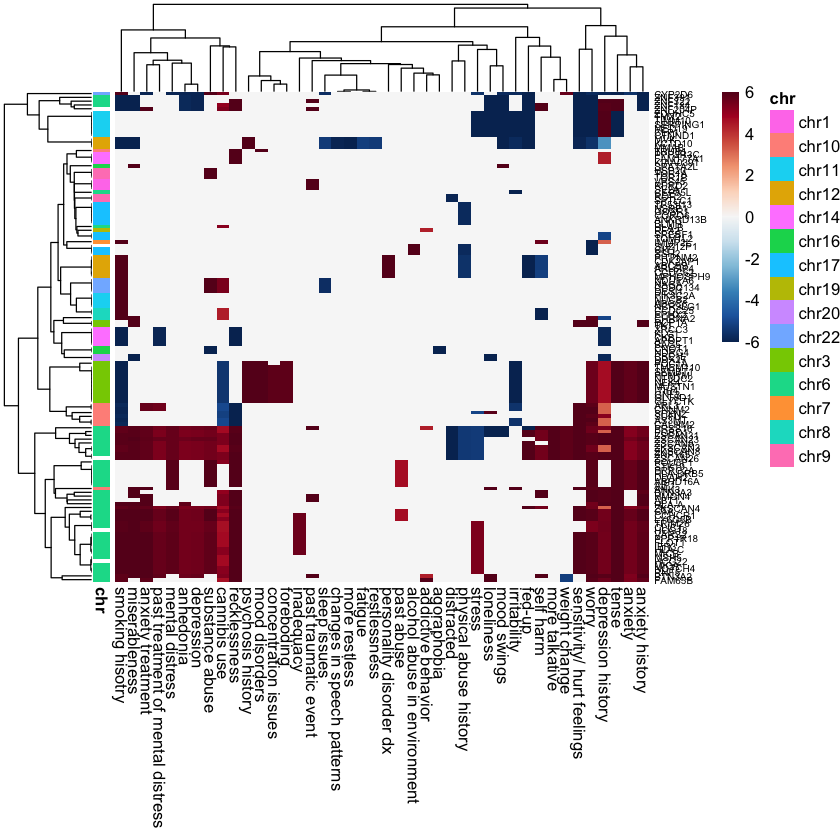

In [8]:
# sort(rownames(gene_phenotype_betamean_wide_df))
p4 = pheatmap(gene_phenotype_betamean_wide_df,
              fontsize_row=6,
                annotation_row=gene_to_chr,
               color = colorRampPalette(rev(brewer.pal(n =11, name ="RdBu")))(255))

save_pheatmap_pdf(p4, paste0(save_dir,'gene_phenotype_betamean_norm_heatmap.pdf' ),
                 width= 8,height= 16)#round(dim(gene_phenotype_betamean_wide_df)[1]/8))

manual edits remove things that are too close to one another

[1] 129  42

[1] 54 42

pdf 
  2

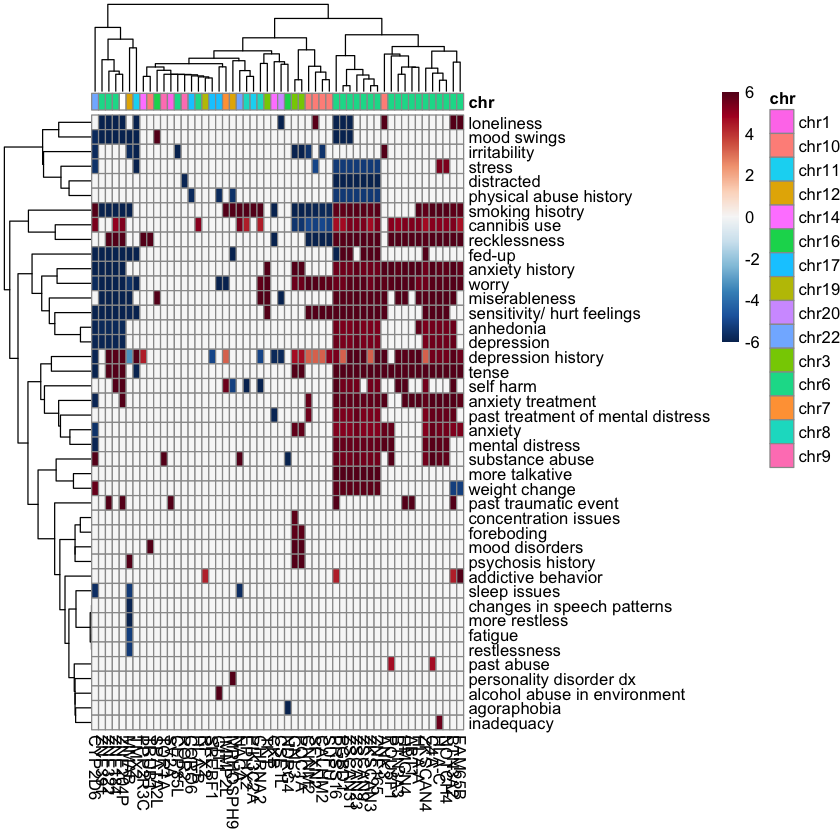

pdf 
  2

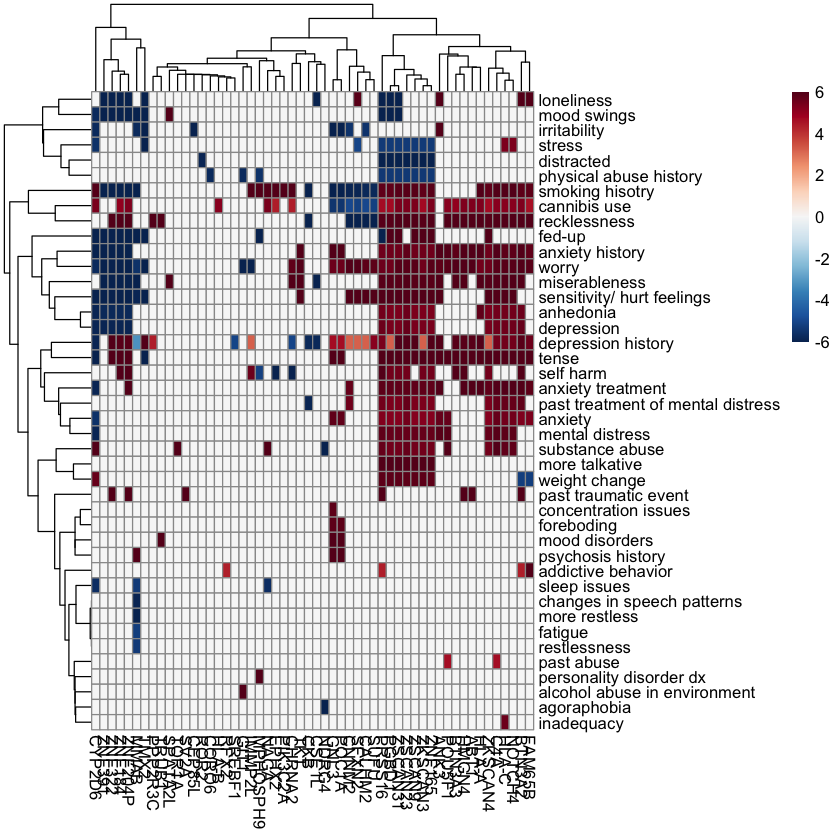

In [9]:
remove_genes = c('CCHCR1','LY6G5B',# for C4A
                'TRIM26','HCG18',# for NOTCH4
                'PPP1R18','FLOT1','LY6G5B','CCHCR1',
                 'IER3','MICB','MSH5','MICA','HCG22','RNF5','VARS2','CLIC1', #for C4A HLA-C
                'DCP1A', # for TKT
                'STK19','DDAH2','HLA-DRB5','ABHD16A','AIF1','PRRC2A',
                'ZSCAN26', 'ZKSCAN8','AS3MT','ARL3',# for ZNF165
                'TMEM110','SFMBT1','PPM1M','NT5DC2','NEK4','MUSTN1','ITIH4','GLT8D1', # for GNL3
                'ZDHHC5','TIMM10','SERPING1','MED19','CLP1','CTNND1',# for TMX2
                'KCTD10','MVK',# for MMAB
                'BAG5','APOPT1','KLC1','XRCC3',# for CKB
                'CNOT1',# for NDRG4
                'DDX27', #for CSE1L
                'FAM177A1', 'KIAA0391',#for PPP2R3C
                'TOR1B','USP20',#for TOR1A
                'VPS45','RPRD2',# for sv2a
                'SPTLC1',# for ROR2
                'ANKRD13B','TP53I13','NSRP1','GOSR1','BLMH',# for CORO6
                'TOM1L2', #for SREBF1
                'SUZ12P1','SSH2', #for GIT1
                 'PITPNM2','CDK2AP1','ABCB9','ARL6IP4','CCDC62',#for MPHOSPH9 (b/c ATAC but really meh)
                'DESI1','CCDC134','NDUFA6',# for NAGA
                'ABCC8','NCR3LG1','NUCB2',# for PIK3C2A
                'GLYCTK',#for GNL3
                'CCDC25'# for PIK3C2A
                )
dim(gene_phenotype_betamean_wide_df)

gene_phenotype_betamean_wide_df_filt = gene_phenotype_betamean_wide_df[! (rownames(gene_phenotype_betamean_wide_df) %in% remove_genes),]
dim(gene_phenotype_betamean_wide_df_filt)
p5 = pheatmap(t(gene_phenotype_betamean_wide_df_filt),
#               fontsize_row=6,
                annotation_col=gene_to_chr,
               color = colorRampPalette(rev(brewer.pal(n =11, name ="RdBu")))(255))

save_pheatmap_pdf(p5, paste0(save_dir,'gene_phenotype_betamean_norm_heatmap_filt_wchr.pdf' ),
                 width= 12,height= 9)#round(dim(gene_phenotype_betamean_wide_df)[1]/8))

p5 = pheatmap(t(gene_phenotype_betamean_wide_df_filt),
#               fontsize_row=6,
#                 annotation_col=gene_to_chr,
               color = colorRampPalette(rev(brewer.pal(n =11, name ="RdBu")))(255))

save_pheatmap_pdf(p5, paste0(save_dir,'gene_phenotype_betamean_norm_heatmap_filt.pdf' ),
                 width= 12,height= 9)#round(dim(gene_phenotype_betamean_wide_df)[1]/8))



# do BD and SCZ diseases only

In [11]:
colnames(dz_gene_bin)

[1] "X1"          "anxiety"     "attent"      "autism"      "bipolar"    
 [6] "depress"     "ocd"         "panic"       "personality" "schizo"     
[11] "traum"

In [14]:
mdd_update = read.table('D_mpraanalyze_barcode_allelic/egene_gtex/depress_updatedhoward.txt',
          stringsAsFactor=F)$V1
dz_gene_bin = read_csv(paste0('D_mpraanalyze_barcode_allelic/','dz_gene_bin_dict_all_genes.csv'))
dim(dz_gene_bin)
dz_gene_bin = dz_gene_bin%>%
    filter(!grepl("ENSG",X1))%>%
    column_to_rownames('X1')
head(dz_gene_bin)
dim(dz_gene_bin)
dz_gene_bin[mdd_update,"depress"] = 1
dz_gene_bin = drop_na(dz_gene_bin)
dim(dz_gene_bin)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  anxiety = col_double(),
  attent = col_double(),
  autism = col_double(),
  bipolar = col_double(),
  depress = col_double(),
  ocd = col_double(),
  panic = col_double(),
  personality = col_double(),
  schizo = col_double(),
  traum = col_double()
)



[1] 428  11

,anxiety,attent,autism,bipolar,depress,ocd,panic,personality,schizo,traum
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCB9,0,0,0,1,0,0,0,0,1,0
ABCC8,0,0,0,1,0,0,0,0,1,0
ABHD16A,0,0,0,1,0,0,0,0,1,0
ABT1,0,0,0,0,0,0,0,0,1,0
ACADM,0,1,0,0,0,0,0,0,0,0
ACO2,0,0,0,0,1,0,0,0,0,0


[1] 428  10

[1] 428  10

[1] 94 42

[1] 36 42

[1] 36 42

[1] 36 41

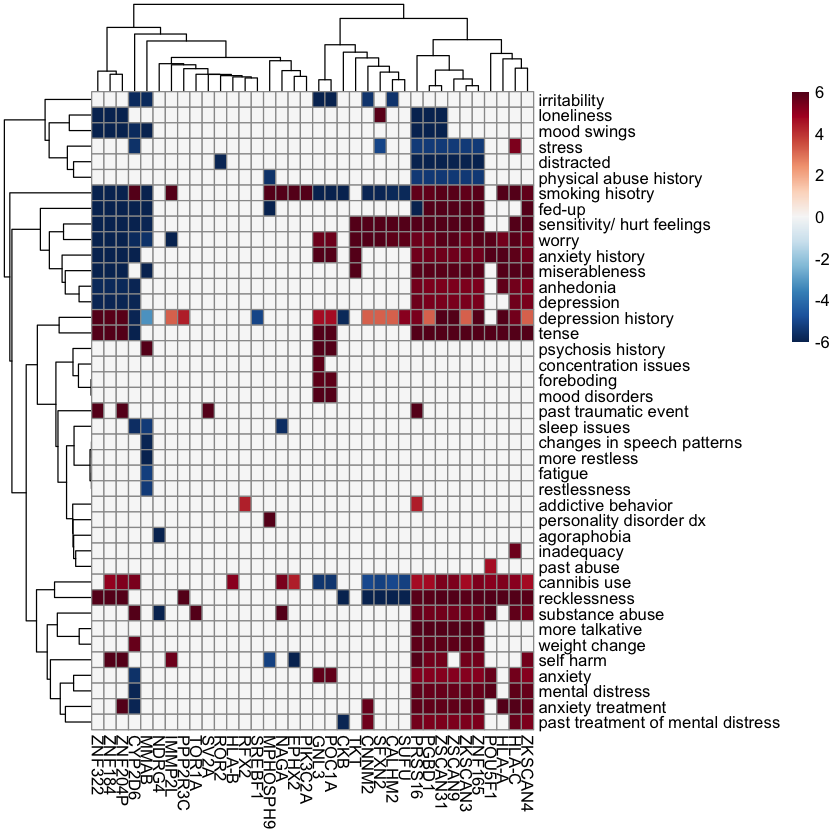

In [29]:
bp_mdd_genes = dz_gene_bin%>%
    rownames_to_column()%>%
    filter((schizo==1)&(bipolar==1))%>%
    select(rowname)
gene_phenotype_sel = gene_phenotype_betamean_wide_df[rownames(gene_phenotype_betamean_wide_df) %in% sort(bp_mdd_genes$rowname),]
dim(gene_phenotype_sel)
gene_phenotype_sel = gene_phenotype_sel[! (rownames(gene_phenotype_sel) %in% remove_genes),]

dim(gene_phenotype_sel)
# filtering
# filter by gene ( at least 1 signficant hit)
rowmaxes = apply(X=abs(gene_phenotype_sel), MARGIN=1, FUN=max)
gene_phenotype_sel = gene_phenotype_sel[rowmaxes>1e-4 ,]
dim(gene_phenotype_sel)

# filter bo column (phenotype) (phenotype has at least 1 significant hit)
colmaxes = apply(X=abs(gene_phenotype_sel), MARGIN=2, FUN=max)
gene_phenotype_sel = gene_phenotype_sel[,colmaxes>1e-4]
dim(gene_phenotype_sel)

p5 = pheatmap(t(gene_phenotype_sel),
#               fontsize_row=6,
#                 annotation_col=gene_to_chr,
               color = colorRampPalette(rev(brewer.pal(n =11, name ="RdBu")))(255))



In [ ]:
# colMax <- function(data) sapply(data, max, na.rm = TRUE)

# gene_phenotype_betamean_wide_df = read.csv(paste0(save_dir, 'gene_phenotype_wide_df_beta_manual.csv'),
#                                       row.names=1, check.names=FALSE, stringsAsFactor=F)
# # gene_phenotype_betamean_wide_df = dplyr::select(gene_phenotype_betamean_wide_df, -X)
# gene_phenotype_betamean_wide_df[gene_phenotype_betamean_wide_df>.1] = .1
# gene_phenotype_betamean_wide_df[gene_phenotype_betamean_wide_df< -.1] = -.1

# dim(gene_phenotype_betamean_wide_df)
# # 'NEK4' %in% rownames(gene_phenotype_betamean_wide_df)

# # # filtering genes of interest
# dim(gene_phenotype_betamean_wide_df)
# genes_of_interest =common_genes# intersect(common_genes, interesting_egenes)
# genes_of_interest = union(genes_of_interest, c('CHRNA2',"TIMM10","CALHM2", 'NEK4','PEMT','GIT1','CNNM2','HLA-C','TOR1A','CYP2D6'))
# gene_phenotype_betamean_wide_df = gene_phenotype_betamean_wide_df[rownames(gene_phenotype_betamean_wide_df) %in% genes_of_interest ,]%>%drop_na()
# 'NEK4' %in% rownames(gene_phenotype_betamean_wide_df)
# dim(gene_phenotype_betamean_wide_df)

# # filter by gene ( at least 1 signficant hit)
# rowmaxes = apply(X=abs(gene_phenotype_betamean_wide_df), MARGIN=1, FUN=max)
# gene_phenotype_betamean_wide_df = gene_phenotype_betamean_wide_df[rowmaxes>1e-4 ,]
# 'NEK4' %in% rownames(gene_phenotype_betamean_wide_df)
# dim(gene_phenotype_betamean_wide_df)

# # filter bo column (phenotype) (phenotype has at least 1 significant hit)
# colmaxes = apply(X=abs(gene_phenotype_betamean_wide_df), MARGIN=2, FUN=max)
# gene_phenotype_betamean_wide_df = gene_phenotype_betamean_wide_df[,colmaxes>1e-4]
# 'NEK4' %in% rownames(gene_phenotype_betamean_wide_df)
# dim(gene_phenotype_betamean_wide_df)


# # SCALE/NORM
# THRES=6
# # colMax(gene_phenotype_betamean_wide_df)
# gene_phenotype_betamean_wide_df = sign(gene_phenotype_betamean_wide_df)*log2(abs(gene_phenotype_betamean_wide_df)+1e-2)
# # gene_phenotype_betamean_wide_df = scale(gene_phenotype_betamean_wide_df)
# gene_phenotype_betamean_wide_df[gene_phenotype_betamean_wide_df>THRES] = THRES
# gene_phenotype_betamean_wide_df[gene_phenotype_betamean_wide_df< -THRES] = -THRES
# 'NEK4' %in% rownames(gene_phenotype_betamean_wide_df)
# head(gene_phenotype_betamean_wide_df)
